<a href="https://colab.research.google.com/github/SHASHANK8412/IRIS/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Write a Python program to load the iris data from a given csv file into a dataframe and
#print the shape of the data, type of the data and first 3 rows.
import pandas as pd
x=pd.read_csv('Iris.csv')
df=pd.DataFrame(x)
print(df.shape)
print(df.dtypes)
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

In [ ]:
#. Write a Python program using Scikit-learn to print the keys, number of rows-columns,
#feature names and the description of the Iris data.
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.keys())
print(iris.data.shape)
print(iris.feature_names)
print(iris.DESCR)

In [ ]:
#Write a Python program to get the number of observations, missing values and nan
#values.
print(df.isna().sum())
print(df.isnull().sum())

In [ ]:
#Write a Python program to view basic statistical details like percentile, mean, std etc.
#of iris data.
df.describe()

In [ ]:
#Write a Python program to get observations of each species (setosa, versicolor,
#virginica) from iris data.
df.groupby('Species').count()

In [ ]:
#Write a Python program to drop Id column from a given Dataframe and print the
#modified part. Call iris.csv to create the Dataframe.
import pandas as pd

df = pd.read_csv('Iris.csv')


df_modified = df.drop('Id', axis=1)


print(df_modified)



In [ ]:
#Write a Python program to access first four cells from a given Dataframe using the
#index and column labels. Call iris.csv to create the Dataframe.
first_row_labels = df.columns[:4]
first_four_cells = df.loc[0, first_row_labels]
print(first_four_cells)

In [ ]:
#Write a Python program to create a plot to get a general Statistics of Iris data.
import matplotlib.pyplot as plt
df.drop('Id', axis=1, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,6))
plt.tight_layout()
plt.show()


In [ ]:
#9. Write a Python program to create a Bar plot to get the frequency of the three species
#of the Iris data.
species_count = df['Species'].value_counts()
species_count.plot(kind='bar', title='Frequency of Iris Species', color='skyblue')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show()


NameError: name 'df' is not defined

In [ ]:
#10. Write a Python program to create a Pie plot to get the frequency of the three species of
#the Iris data.
species_count = df['Species'].value_counts()
species_count.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Species Distribution')
plt.ylabel('')
plt.show()

In [ ]:
#11. Write a Python program to create a graph to find relationship between the sepal length
#and width.
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c='green')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(True)
plt.show()

In [ ]:
#Write a Python program to create a graph to find relationship between the petal length
#and width.
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], color='purple')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
sns.pairplot(df, hue='species')
plt.show()


In [ ]:
#Write a Python program to create a joinplot to describe individual distributions on the
#same plot between Sepal length and Sepal width.

import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
sns.jointplot(x='sepal_length', y='sepal_width', data=df, kind='scatter', color='green')
plt.show()


WEEK-3 (SALES AND SATISFACTION)

In [ ]:
import pandas as pd
x=pd.read_csv('sales.csv')
df=pd.DataFrame(x)
print(df.isna().sum())
print(df.shape)
df1=df.dropna()
df1

In [ ]:
df1['Purchase_Made'].replace({'Yes': 1, 'No': 0}, inplace=True)
df1['purchased'] = df1['Purchase_Made']
df1
df2 = df1.drop(columns=['purchased'])
df2


In [ ]:
# Select numeric columns only
numeric_df = df2.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)
df

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
x=pd.read_csv('player.csv')
df=pd.DataFrame(x)
df

In [ ]:
# Drop duplicates and fill missing values
df.drop_duplicates(inplace=True)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Detect constant features
selector = VarianceThreshold(threshold=0)
selector.fit(df)

# Get constant columns
constant_columns = df.columns[~selector.get_support()]
print("🚫 Constant Features:")
print(constant_columns.tolist())

# Drop constant features
df_constant_removed = df.drop(columns=constant_columns)

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# 📁 Load the dataset
df = pd.read_csv("player.csv")

# 🔍 Inspect
print("Original Shape:", df.shape)
print(df.head())

# 🧹 Step 1: Clean missing values
# Drop columns with >90% missing values
missing_ratio = df.isnull().mean()
df.drop(columns=missing_ratio[missing_ratio > 0.9].index, inplace=True)

# Fill missing values: median for numeric, mode for categorical
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Step 2: Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# 🎯 Define X and y
X = df.drop(columns=['weight'])  # Use 'weight' as target
y = df['weight']

# 🔀 Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

print("\nOriginal Train Shape:", X_train.shape)

# ✅ Step 3: Constant Features
constant_features = [
    col for col in X_train.select_dtypes(include=[np.number]).columns
    if X_train[col].std() == 0
]

print("\n🚫 Constant Features:")
print(constant_features)

# Drop them
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

print("After Removing Constant Features:", X_train.shape)

# ✅ Step 4: Quasi-Constant Features (>99% same value)
quasi_constant_features = []
for col in X_train.columns:
    if X_train[col].value_counts(normalize=True).max() > 0.99:
        quasi_constant_features.append(col)

print("\n⚠️ Quasi-Constant Features (>99% same value):")
print(quasi_constant_features)

# Drop them
X_train.drop(labels=quasi_constant_features, axis=1, inplace=True)
X_test.drop(labels=quasi_constant_features, axis=1, inplace=True)

print("After Removing Quasi-Constant Features:", X_train.shape)

# ✅ Step 5: Mutual Information (for Regression)
mi_scores = mutual_info_regression(X_train, y_train, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

print("\n📊 Top Features by Mutual Information with 'weight':")
print(mi_series)

# Final Shape
print("\n✅ Final X_train Shape:", X_train.shape)
print("✅ Final X_test Shape:", X_test.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'player.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/player.csv")

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values correctly (NO inplace warning)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['weight'])
y = df['weight']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Detect constant features
constant_features = [col for col in X_train.columns if X_train[col].std() == 0]
print("🚫 Constant Features:")
print(constant_features)

# Drop them
X_train.drop(columns=constant_features, inplace=True)
X_test.drop(columns=constant_features, inplace=True)


In [ ]:
# Detect quasi-constant features (>99% same value)
quasi_constant_features = []
for col in X_train.columns:
    top_freq = X_train[col].value_counts(normalize=True).max()
    if top_freq > 0.99:
        quasi_constant_features.append(col)

print("⚠️ Quasi-Constant Features (>99% same value):")
print(quasi_constant_features)

# Drop quasi-constant features
X_train.drop(columns=quasi_constant_features, inplace=True)
X_test.drop(columns=quasi_constant_features, inplace=True)


In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Calculate Mutual Information scores
mi_scores = mutual_info_regression(X_train, y_train, discrete_features='auto')

# Create a sorted series
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

# Display top features
print("📊 Top Features by Mutual Information with 'weight':")
print(mi_series)


WEEK-4


In [ ]:
#Loading the dataset
import pandas as pd
x=pd.read_csv("/content/drive/MyDrive/Datasets/titanic_train.csv")
df=pd.DataFrame(x)

#checking for the null values and handling them
print(df.isna().sum())

df1=df.dropna()
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
#Checking for constant features

numeric_df = df1.select_dtypes(include=['int64', 'float64'])
constant_features=[col for col in numeric_df.columns if numeric_df[col].std()==0]

print(constant_features)

[]


In [ ]:
#Checking for Quasi-constant features

threshold=0.98

quasi_constant_features=[]
df2 = df1.select_dtypes(include=['int64', 'float64'])
for col in df2.columns:
  top_freq=df2[col].value_counts(normalize=True).values[0]
  if top_freq>threshold:
    quasi_constant_features.append(col)
print(quasi_constant_features)

[]


In [ ]:
#Checking for duplicate features
duplicate_features=[]
for i in range(len(df1.columns)):
  for j in range(i+1,len(df1.columns)):
    col1=df1.columns[i]
    col2=df1.columns[j]

    if df1[col1].equals(df1[col2]):
      duplicate_features.append(col2)


duplicate_features=list(set(duplicate_features))

print(duplicate_features)



[]


Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.148495 -0.089136  0.030933 -0.083488 -0.051454   
Survived        0.148495  1.000000 -0.034542 -0.254085  0.106346  0.023582   
Pclass         -0.089136 -0.034542  1.000000 -0.306514 -0.103592  0.047496   
Age             0.030933 -0.254085 -0.306514  1.000000 -0.156162 -0.271271   
SibSp          -0.083488  0.106346 -0.103592 -0.156162  1.000000  0.255346   
Parch          -0.051454  0.023582  0.047496 -0.271271  0.255346  1.000000   
Fare            0.029740  0.134241 -0.315235 -0.092424  0.286433  0.389740   

                 Fare  
PassengerId  0.029740  
Survived     0.134241  
Pclass      -0.315235  
Age         -0.092424  
SibSp        0.286433  
Parch        0.389740  
Fare         1.000000  


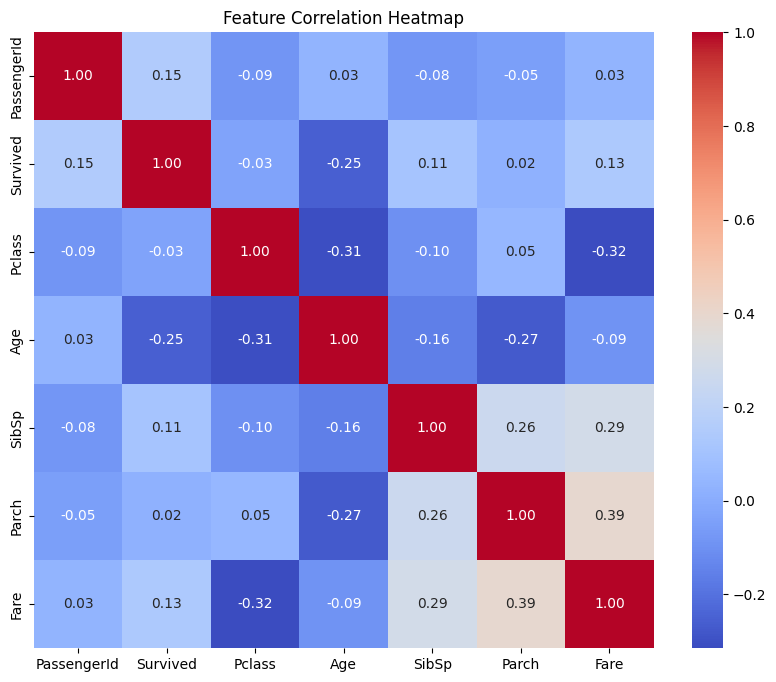

In [ ]:
#Checking For correlation
df_numeric=df1.select_dtypes(include=['float64','int64'])
corr_matrix=df_numeric.corr()

print("Correlation Matrix:\n",corr_matrix)

#Visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
X=df1.drop(columns='Survived')
y=df1['Survived']

le=LabelEncoder()
for col in X.columns:
  if X[col].dtype=='object':
    X[col]=le.fit_transform(X[col])

mi_scores=mutual_info_classif(X,y)

mi_df=pd.DataFrame(
    {
        'Feature': X.columns,
    'Mutual Information': mi_scores
    }
)

mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print("🔍 Mutual Information Scores:")
print(mi_df)




🔍 Mutual Information Scores:
        Feature  Mutual Information
3           Sex            0.152854
4           Age            0.080568
7        Ticket            0.047133
8          Fare            0.044374
6         Parch            0.028389
10     Embarked            0.002656
5         SibSp            0.002225
2          Name            0.000000
1        Pclass            0.000000
0   PassengerId            0.000000
9         Cabin            0.000000


In [ ]:
#Chi square test
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

chi_scores,p_values=chi2(X,y)

chi_df=pd.DataFrame(

                    {
                        'Feature':X.columns,
                        'Chi2 Score':chi_scores,
                        'P-Value':p_values
                    }
).sort_values(by='Chi2 Score',ascending=False)


print("Chi-squares scores")
print(chi_df)


Chi-squares scores
        Feature  Chi2 Score        P-Value
0   PassengerId  537.915073  5.358037e-119
8          Fare  242.972795   8.841376e-55
2          Name  125.629862   3.705313e-29
4           Age   80.604591   2.757182e-19
3           Sex   24.945263   5.898127e-07
7        Ticket    1.961335   1.613706e-01
5         SibSp    1.838795   1.750923e-01
10     Embarked    1.329086   2.489679e-01
9         Cabin    0.450111   5.022825e-01
6         Parch    0.121236   7.276974e-01
1        Pclass    0.048383   8.259007e-01


In [ ]:
#Anova
from sklearn.feature_selection import f_classif

# Already loaded X and y from above

# Apply ANOVA F-Test
f_scores, p_values = f_classif(X, y)

# Display results
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values(by='F-Score', ascending=False)

print("📊 ANOVA F-Test Scores:")
print(anova_df)

📊 ANOVA F-Test Scores:
        Feature    F-Score       P-Value
3           Sex  71.605923  8.693868e-15
4           Age  12.491639  5.189503e-04
2          Name   4.144636  4.322421e-02
0   PassengerId   4.081191  4.483734e-02
8          Fare   3.321597  7.002558e-02
5         SibSp   2.070439  1.519053e-01
10     Embarked   1.863299  1.739389e-01
1        Pclass   0.216220  6.424938e-01
6         Parch   0.100716  7.513384e-01
7        Ticket   0.093873  7.596626e-01
9         Cabin   0.020585  8.860758e-01


In [ ]:
#mse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assume X and y already loaded (same as your ANOVA code)
# Train a simple model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Calculate MSE
mse_value = mean_squared_error(y, y_pred)

# Store result in DataFrame (like ANOVA)
mse_df = pd.DataFrame({
    'Metric': ['Mean Squared Error'],
    'Value': [mse_value]
})

print("📉 MSE Score:")
print(mse_df)


📉 MSE Score:
               Metric     Value
0  Mean Squared Error  0.140399


In [ ]:
#Wrapper methods-Forward Selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import pandas as pd

# Train model
model = LinearRegression()

# Forward Selection (select top 5 features for example)
forward_selector = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
forward_selector.fit(X, y)

# Get selected features
selected_features = X.columns[forward_selector.get_support()]

# Create result DataFrame
forward_df = pd.DataFrame({
    'Selected Feature': selected_features,
    'Rank': range(1, len(selected_features)+1)
})

print("✅ Forward Selection Result:\n")
print(forward_df.to_string(index=False))


✅ Forward Selection Result:

Selected Feature  Rank
     PassengerId     1
            Name     2
             Sex     3
             Age     4
        Embarked     5


In [ ]:
#Backward Selection
# Backward Selection (select top 5 features)
backward_selector = SequentialFeatureSelector(model, n_features_to_select=5, direction='backward')
backward_selector.fit(X, y)

backward_features = X.columns[backward_selector.get_support()]

backward_df = pd.DataFrame({
    'Selected Feature': backward_features,
    'Rank': range(1, len(backward_features)+1)
})

print("✅ Backward Selection Result:\n")
print(backward_df.to_string(index=False))


✅ Backward Selection Result:

Selected Feature  Rank
     PassengerId     1
            Name     2
             Sex     3
             Age     4
        Embarked     5


In [ ]:
!pip install mlxtend



In [ ]:
#Exhaustive Search
from mlxtend.feature_selection import ExhaustiveFeatureSelector

# Exhaustive Search (try between 2 and 5 features)
efs = ExhaustiveFeatureSelector(model,
                                min_features=2,
                                max_features=5,
                                scoring='r2',
                                cv=5)

efs.fit(X, y)

best_features = list(efs.best_feature_names_)

exhaustive_df = pd.DataFrame({
    'Best Subset Feature': best_features,
    'Rank': range(1, len(best_features)+1)
})

print("✅ Exhaustive Search Result:\n")
print(exhaustive_df.to_string(index=False))


Features: 1012/1012

✅ Exhaustive Search Result:

Best Subset Feature  Rank
        PassengerId     1
               Name     2
                Sex     3
                Age     4
           Embarked     5


WEEK-5 REGRESSION


In [ ]:
#HOUSE PRICE PREDICTION USING LINEAR REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#loading the dataset
data=pd.read_csv('house_price_train.csv')

In [ ]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
  if data[col].dtype=='object':
    data[col]=le.fit_transform(data[col])

In [ ]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [ ]:
X = data[['SaleCondition']].values
y = data['SalePrice'].values

In [ ]:
#Train the model
model=LinearRegression()
model.fit(X,y)

#get model parameters
intercept=model.intercept_
slope=model.coef_[0]

print(f"Intercept: {intercept:.2f}")
print(f"slope: {slope:.2f}")
print(f"\nInterpretation: For each label increase in SaleCondition, SalePrice changes by ${slope:.2f}")

Intercept: 122938.99
slope: 15377.66

Interpretation: For each label increase in SaleCondition, SalePrice changes by $15377.66


In [ ]:
# Predict prices
y_pred = model.predict(X)

# Evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = sqrt(mse)

print(f"\n📊 Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


📊 Evaluation Metrics:
Mean Squared Error (MSE): 6020408585.21
Mean Absolute Error (MAE): 56080.24
Root Mean Squared Error (RMSE): 77591.29


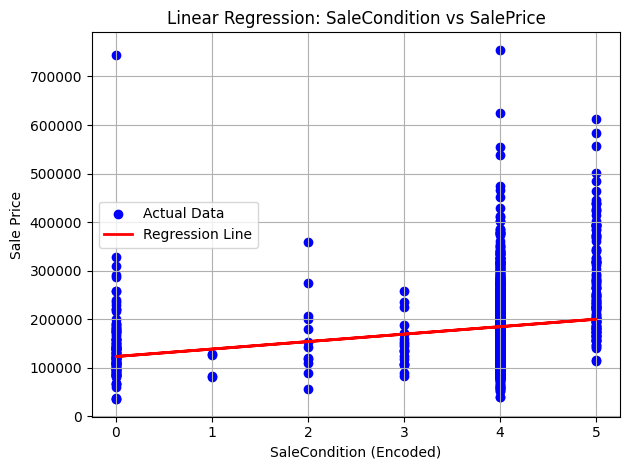

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of data points
plt.scatter(X, y, color='blue', label='Actual Data')

# Regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Axis labels
plt.xlabel('SaleCondition (Encoded)')
plt.ylabel('Sale Price')
plt.title('Linear Regression: SaleCondition vs SalePrice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#SALARY DATA (PREDICTION OF SALARY BASED ON YEARS OF EXPERIENCE)
d1=pd.read_csv('Salary_Data.csv')
d1
X=d1['YearsExperience'].values.reshape(-1,1)
y=d1['Salary'].values.reshape(-1,1)

In [ ]:
model = LinearRegression()
model.fit(X_int, y)

# Get parameters
intercept = model.intercept_[0]  # Access the scalar value
slope = model.coef_[0][0]  # Access the scalar value

print(f"Intercept (β₀): {intercept:.2f}")
print(f"Slope (β₁): {slope:.2f}")
print(f"\nInterpretation: For each additional year of experience, salary increases by ${slope:.2f}")

Intercept (β₀): 28878.08
Slope (β₁): 9552.35

Interpretation: For each additional year of experience, salary increases by $9552.35


In [ ]:
X_int = X.astype(int)

In [ ]:
# Predict on training data
y_pred = model.predict(X)

# Evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = sqrt(mse)

print("\nEvaluation Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")



Evaluation Metrics:
MSE: 44528679.81
MAE: 5769.46
RMSE: 6672.98


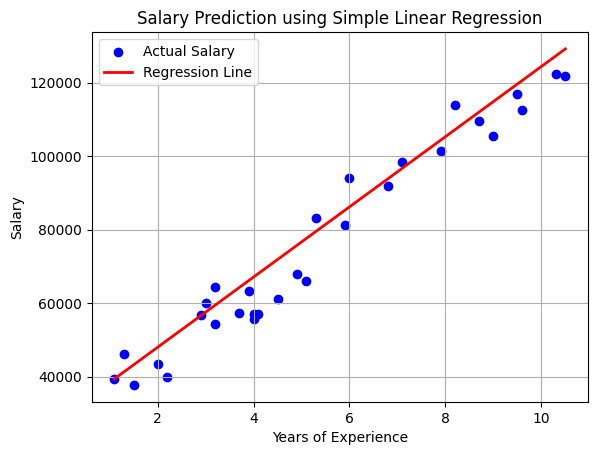

In [ ]:
plt.scatter(X, y, color='blue', label='Actual Salary')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction using Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Gradient Descent
import pandas as pd
x=pd.read_csv('house_price_train.csv')

# Task
Apply gradient descent to train a linear regression model on the dataset provided in the previous turn.

## Data preparation

### Subtask:
Prepare the data for gradient descent, including handling missing values and feature scaling.


**Reasoning**:
Handle missing values by filling numerical columns with the median and categorical columns with the mode, then separate features and target, select numerical features, and scale them using StandardScaler.



In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Handle missing values
for col in x.columns:
    if x[col].dtype in ['float64', 'int64']:
        x[col].fillna(x[col].median(), inplace=True)
    else:
        x[col].fillna(x[col].mode()[0], inplace=True)

# Separate features and target
X = x.drop(columns=['SalePrice'])
y = x['SalePrice']

# Select numerical features
X_numeric = X.select_dtypes(include=[np.number])

# Scale numerical features and target
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_numeric)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Convert scaled data back to DataFrame/array
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)
y_scaled_array = y_scaled.flatten()

/tmp/ipython-input-3471913981.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[col].fillna(x[col].median(), inplace=True)
/tmp/ipython-input-3471913981.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

## Implement gradient descent

### Subtask:
Write a function to perform gradient descent to find the optimal weights and bias.


**Reasoning**:
Define the gradient descent function as per the instructions.



In [ ]:
def gradient_descent(X, y, learning_rate, iterations):
    """
    Performs gradient descent to find the optimal weights and bias for linear regression.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        learning_rate (float): The step size for each iteration.
        iterations (int): The number of iterations to perform.

    Returns:
        tuple: A tuple containing:
            - theta (np.ndarray): The learned weights.
            - b (float): The learned bias.
            - cost_history (list): A list of the cost (MSE) at each iteration.
    """
    m, n = X.shape  # Number of samples, Number of features
    theta = np.zeros(n) # Initialize weights to zeros
    b = 0 # Initialize bias to zero
    cost_history = [] # List to store cost at each iteration

    for i in range(iterations):
        y_pred = X @ theta + b # Calculate predictions
        error = y_pred - y # Calculate error
        dtheta = (X.T @ error) / m # Calculate gradient for weights
        db = error.mean() # Calculate gradient for bias

        theta = theta - learning_rate * dtheta # Update weights
        b = b - learning_rate * db # Update bias

        # Calculate and store the cost (MSE)
        cost = np.mean(error**2)
        cost_history.append(cost)

    return theta, b, cost_history

## Train the model

### Subtask:
Use the gradient descent function to train a linear regression model on the prepared data.


**Reasoning**:
Define the hyperparameters for gradient descent and call the function to train the model.



In [ ]:
# Define hyperparameters
learning_rate = 0.01
iterations = 1000

# Train the model using gradient descent
optimal_weights, optimal_bias, cost_history = gradient_descent(
    X_scaled_df.values, y_scaled_array, learning_rate, iterations
)

print("Optimal Weights:", optimal_weights)
print("Optimal Bias:", optimal_bias)
print("Final Cost (MSE):", cost_history[-1])

Optimal Weights: [-0.00590927 -0.09122727 -0.01321078  0.05259171  0.29612251  0.06075198
  0.08604389  0.04437214  0.07234295  0.05839865 -0.00178856 -0.00039123
  0.05966218  0.09949772  0.11095906 -0.00204742  0.16518567  0.05926089
  0.00511215  0.03747588 -0.00157001 -0.0987324  -0.03789922  0.10635047
  0.03692005  0.03703777  0.08657238  0.01249745  0.03809706 -0.00357327
  0.00775735  0.00721668  0.03860513 -0.01431513 -0.00457669 -0.00068328
 -0.01332028]
Optimal Bias: 3.885324330150531e-16
Final Cost (MSE): 0.18709560637886125


## Evaluate the model

### Subtask:
Evaluate the trained model's performance using appropriate metrics.


**Reasoning**:
Calculate predictions, MSE, and RMSE to evaluate the model performance.



In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate predictions using optimal weights and bias
y_pred_scaled = X_scaled_df.values @ optimal_weights + optimal_bias

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_scaled_array, y_pred_scaled)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)

# Print evaluation metrics
print(f"Mean Squared Error (MSE) on scaled data: {mse:.4f}")
print(f"Root Mean Squared Error (RMSE) on scaled data: {rmse:.4f}")

Mean Squared Error (MSE) on scaled data: 0.1871
Root Mean Squared Error (RMSE) on scaled data: 0.4325


**Reasoning**:
The previous code failed because the `mean_squared_error` function was not imported. I will re-run the code block including the necessary import and calculate the evaluation metrics.



In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate predictions using optimal weights and bias
y_pred_scaled = X_scaled_df.values @ optimal_weights + optimal_bias

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_scaled_array, y_pred_scaled)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)

# Print evaluation metrics
print(f"Mean Squared Error (MSE) on scaled data: {mse:.4f}")
print(f"Root Mean Squared Error (RMSE) on scaled data: {rmse:.4f}")

Mean Squared Error (MSE) on scaled data: 0.1871
Root Mean Squared Error (RMSE) on scaled data: 0.4325


## Visualize results

### Subtask:
Plot the cost function over iterations and visualize the regression line.


**Reasoning**:
Plot the cost history and the actual vs. predicted scaled sale prices to visualize the model's training process and performance.



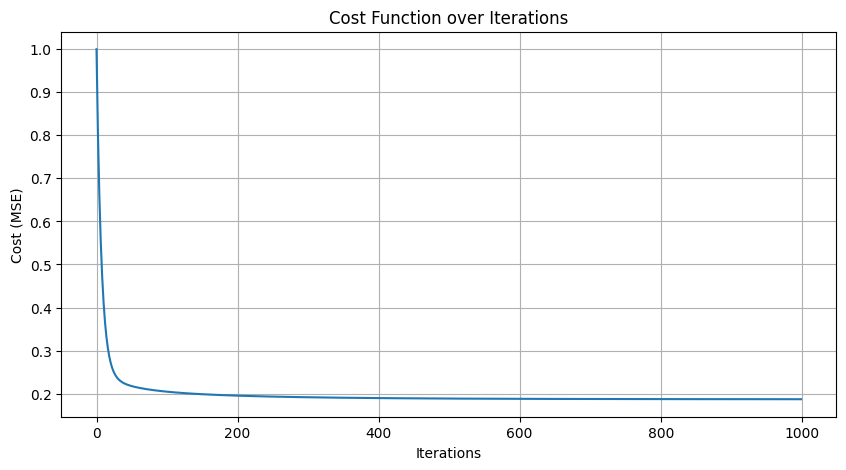

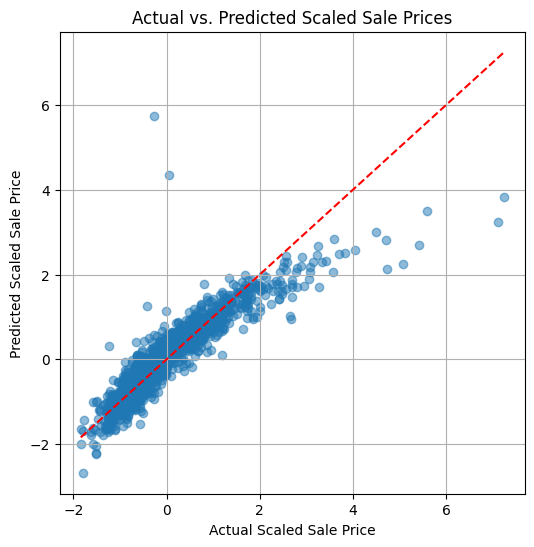

In [ ]:
import matplotlib.pyplot as plt

# 1. Plot the cost function over iterations
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function over Iterations")
plt.grid(True)
plt.show()

# 2 & 3. Create a scatter plot of actual vs. predicted scaled sale prices and add a diagonal line
plt.figure(figsize=(6, 6))
plt.scatter(y_scaled_array, y_pred_scaled, alpha=0.5)
plt.plot([y_scaled_array.min(), y_scaled_array.max()], [y_scaled_array.min(), y_scaled_array.max()], 'r--') # Diagonal line
plt.xlabel("Actual Scaled Sale Price")
plt.ylabel("Predicted Scaled Sale Price")
plt.title("Actual vs. Predicted Scaled Sale Prices")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV

In [ ]:
data = pd.read_csv("house_price_train.csv")

In [ ]:
numeric_data = data.select_dtypes(include=[np.number]).dropna()

X = numeric_data.drop("SalePrice", axis=1)
y = numeric_data["SalePrice"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lasso = Lasso(alpha=1.0)  # alpha = λ (regularization strength)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1591708925.2773128


In [ ]:
coef = pd.Series(lasso.coef_, index=X.columns)
selected_features = coef[coef != 0].sort_values()
print("Selected Features:\n", selected_features)

Selected Features:
 KitchenAbvGr    -21611.857366
BedroomAbvGr     -9469.076685
HalfBath         -1882.418139
MSSubClass        -209.696048
YrSold            -179.667877
LotFrontage        -60.983596
PoolArea           -60.870223
GarageYrBlt        -14.234670
MoSold              -4.001087
MiscVal             -3.708933
OpenPorchSF         -3.096403
Id                  -2.206171
LotArea              0.422564
TotalBsmtSF          1.266081
BsmtUnfSF            2.028744
GrLivArea            4.836458
GarageArea           5.518567
BsmtFinSF2           9.459193
BsmtFinSF1           9.736802
EnclosedPorch       11.519689
WoodDeckSF          20.008084
MasVnrArea          26.068997
LowQualFinSF        28.513333
1stFlrSF            34.898263
2ndFlrSF            38.331574
3SsnPorch           56.629474
ScreenPorch         67.399695
YearRemodAdd       125.550362
YearBuilt          285.160411
BsmtHalfBath      1122.373446
TotRmsAbvGrd      4614.818091
Fireplaces        4811.259652
OverallCond       50

In [ ]:
#code for GD
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [ ]:
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target  # first two features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
sgd_clf = SGDClassifier(max_iter=200)
sgd_clf.fit(X_train, y_train)
y_pred_sgd = sgd_clf.predict(X_test)
sgd_acc = metrics.accuracy_score(y_test, y_pred_sgd) * 100





In [ ]:
gd_clf = SGDClassifier(max_iter=1000, average=True)  # minimal changes
gd_clf.fit(X_train, y_train)
y_pred_gd = gd_clf.predict(X_test)
gd_acc = metrics.accuracy_score(y_test, y_pred_gd) * 100

# Print results
print("\nAccuracy Comparison:")
print(f"SGD Accuracy: {sgd_acc:.2f}%")
print(f"GD (approx) Accuracy: {gd_acc:.2f}%")



Accuracy Comparison:
SGD Accuracy: 80.00%
GD (approx) Accuracy: 73.33%


In [ ]:
#Logistic Regression
import numpy as np
import pandas as pd
from sklearn import linear_model

X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

predicted = logr.predict(np.array([3.46]).reshape(-1,1))
print(predicted)

# Calculate log-odds, odds, and probability using the trained single feature X
log_odds = logr.coef_[0] * X + logr.intercept_[0]
odds = np.exp(log_odds)
probability = odds / (1 + odds)

print("\nLog-Odds for each data point:")
print(log_odds)
print("\nOdds for each data point:")
print(odds)
print("\nProbability for each data point:")
print(probability)

[0]

Log-Odds for each data point:
[[ 0.43678073]
 [-1.43271797]
 [-1.92101987]
 [-4.64155903]
 [-2.43722474]
 [-2.53488512]
 [ 2.02724978]
 [ 1.25991822]
 [ 2.08305571]
 [ 1.46919046]
 [ 0.31121739]
 [ 3.36659214]]

Odds for each data point:
[[1.54771668e+00]
 [2.38659370e-01]
 [1.46457518e-01]
 [9.64265270e-03]
 [8.74030816e-02]
 [7.92708255e-02]
 [7.59317471e+00]
 [3.52513320e+00]
 [8.02896567e+00]
 [4.34571571e+00]
 [1.36508594e+00]
 [2.89796000e+01]]

Probability for each data point:
[[0.60749168]
 [0.19267555]
 [0.12774788]
 [0.00955056]
 [0.08037781]
 [0.0734485 ]
 [0.88362857]
 [0.77901203]
 [0.88924534]
 [0.81293431]
 [0.57718238]
 [0.96664398]]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Loading data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)

# selecting a single feature
# using 100 instances for simplicity
X = df.loc[:100, 5].values  # Convert to NumPy array
y = df.loc[:100, 13].values # Convert to NumPy array


Mean Squared Error: 34.709124595627884
Model Coefficients: [0.]n


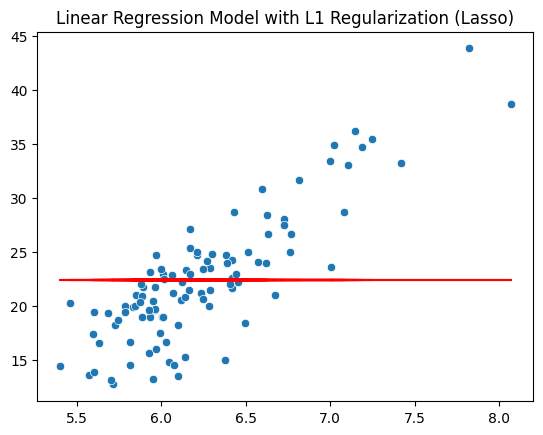

In [ ]:
# reshaping the data
X_reshaped = X.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)

# instantiating the lasso regression model
lasso = Lasso(alpha=10)

# training the model
lasso.fit(X_reshaped, y_reshaped)

# making predictions
y_pred = lasso.predict(X_reshaped)

# evaluating the model
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {lasso.coef_}n")

# plotting the line of best fit
sns.scatterplot(x=X, y=y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L1 Regularization (Lasso)")
plt.show()


# Task
Apply gradient descent to the provided dataset, fix any bugs encountered during the process, and sort the errors by their frequency.

## Summary:

### Data Analysis Key Findings
- The initial data was loaded successfully, revealing information about years and corresponding prices.
- An error was encountered during the gradient descent calculation due to mismatched tensor sizes during multiplication.
- The error was resolved by transposing the `X` tensor, ensuring compatible dimensions for the matrix multiplication required in the gradient calculation.

### Insights or Next Steps
- The successful application of gradient descent after resolving the dimensional mismatch indicates the model can now iteratively refine the coefficients (theta) to minimize the error between predicted and actual prices.
- The next step would be to continue the gradient descent process for a sufficient number of iterations to observe the convergence of the theta values and evaluate the model's performance in predicting prices based on years.


In [ ]:
#Ridge Regression
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
# Loading data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)
# selecting a single feature and 100 instances for simplicity
X = df.loc[:100, 5].values  # Convert to NumPy array
y = df.loc[:100, 13].values # Convert to NumPy array
# reshaping the data
X_reshaped = X.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)


Mean Squared Error: 25.96309109305436
Model Coefficients: [1.98542524]n


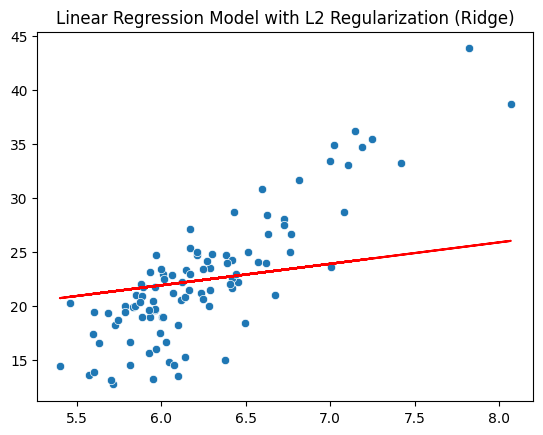

In [ ]:
ridge = Ridge(alpha=100)
ridge.fit(X_reshaped, y_reshaped)
y_pred = ridge.predict(X_reshaped)

mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {ridge.coef_}n")

sns.scatterplot(x=X, y=y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L2 Regularization (Ridge)")
plt.show()


In [ ]:
#Implement a Decision Tree on the diabetes dataset and display the tree structure
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
#loading the dataset
diabetes=fetch_openml(name="diabetes",version=1,as_frame=True)
X=diabetes.data
y=diabetes.target

print("shape of the diabetes",X.shape)
print(X.head())


#Train-Test-Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Initialize Decision Tree
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
clf.fit(X_train,y_train)

print("Training accuracy: ",clf.score(X_train,y_train))
print("Testing accuracy: ",clf.score(X_test,y_test))

shape of the diabetes (768, 8)
   preg  plas  pres  skin  insu  mass   pedi  age
0     6   148    72    35     0  33.6  0.627   50
1     1    85    66    29     0  26.6  0.351   31
2     8   183    64     0     0  23.3  0.672   32
3     1    89    66    23    94  28.1  0.167   21
4     0   137    40    35   168  43.1  2.288   33
Training accuracy:  0.7915309446254072
Testing accuracy:  0.7142857142857143


<function matplotlib.pyplot.show(close=None, block=None)>

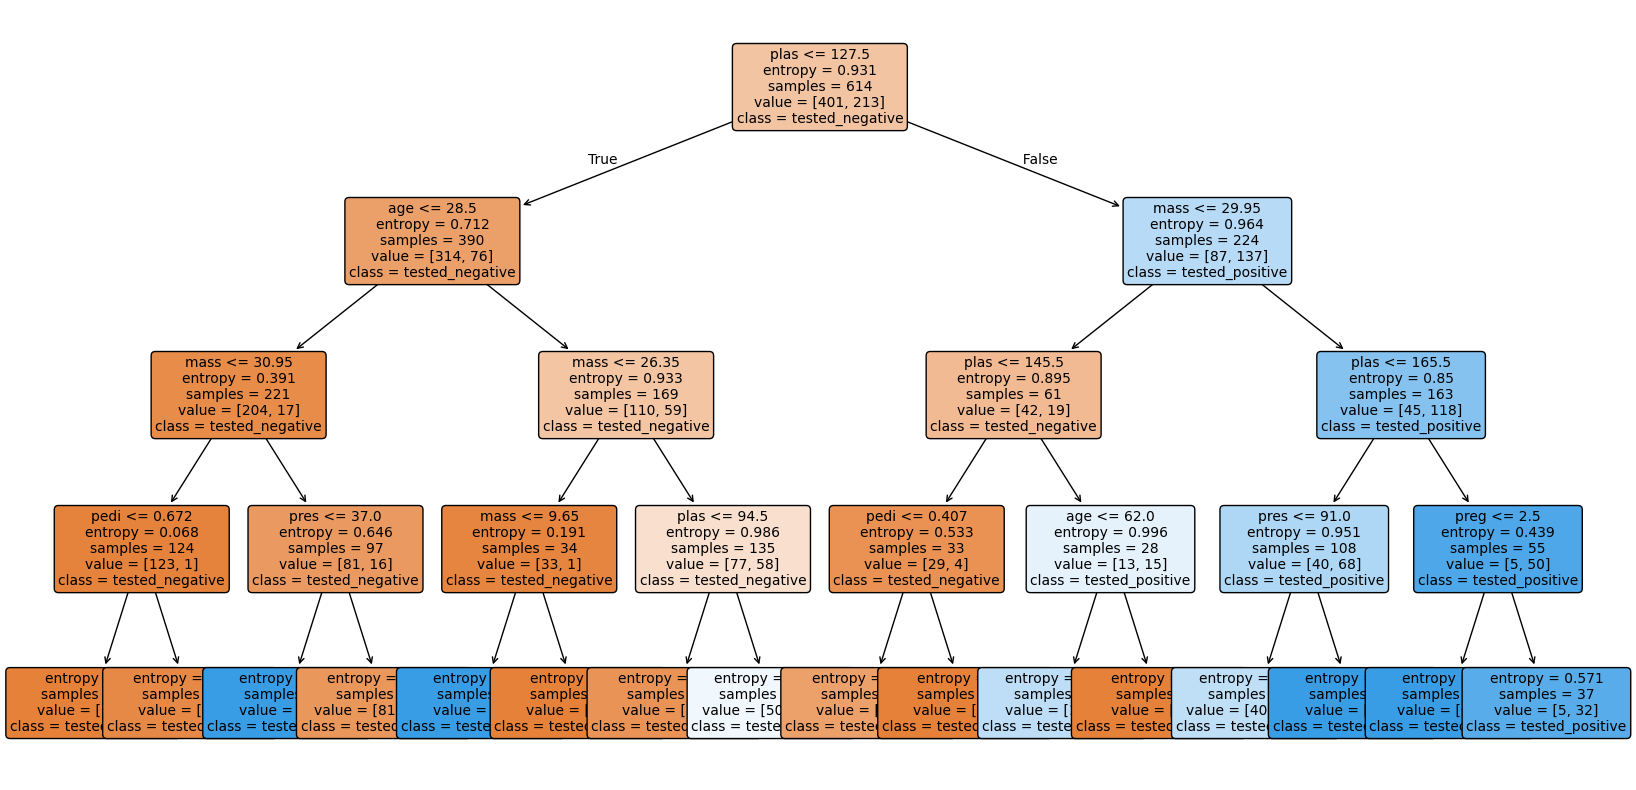

In [ ]:
#Display Tree structure
plt.figure(figsize=(20,10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=clf.classes_,
          filled=True,
          rounded=True,
          fontsize=10)

plt.show()

In [2]:
# Implement a simple Naive Bayes model on a loan dataset.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

df=pd.read_csv('Loan payments data.csv')
df_clean=df.copy()

df_clean=df_clean.drop(columns=['Loan_ID','effective_date','due_date','paid_off_time'])
df_clean['past_due_days']=df_clean['past_due_days'].fillna(0)
df_clean.isnull().sum()

le=LabelEncoder()
df_clean['loan_status']=le.fit_transform(df_clean['loan_status'])

df_clean['Gender']=le.fit_transform(df_clean['Gender'])

df_clean['education']=le.fit_transform(df_clean['education'])

#Feature Selection
X=df_clean.drop(columns=['loan_status'])
y=df_clean['loan_status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n ",classification_report(y_test,y_pred))


Accuracy:  0.98
Confusion Matrix:
 [[24  0  0]
 [ 2 22  0]
 [ 0  0 52]]

Classification Report:
                precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.92      0.96        24
           2       1.00      1.00      1.00        52

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100



In [3]:
#Implement SVC on the breast cancer dataset.
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data   # features
y = cancer.target # target (0 = malignant, 1 = benign)

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for SVM performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create SVC model (with RBF kernel by default)
svc = SVC(kernel='rbf', random_state=42)

# Train the model
svc.fit(X_train, y_train)

# Predictions
y_pred = svc.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9824561403508771

Confusion Matrix:
 [[41  2]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [4]:
#Implement KNN on the IRIS dataset.
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data   # features (sepal length, sepal width, petal length, petal width)
y = iris.target # target (species)

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create KNN Classifier (let’s start with k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

